In [39]:
from langchain_openai import ChatOpenAI


llm = ChatOpenAI(model='gpt-4o-mini')

llm.invoke("Hi!")

AIMessage(content='Hello! How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f33667828e', 'finish_reason': 'stop', 'logprobs': None}, id='run-0e705763-2e67-4cc6-9620-bb47fc71e703-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18})

In [41]:
from langchain_ollama import ChatOllama

In [42]:
llm = ChatOllama(model='llama3.1')

llm.invoke("Hi!")

AIMessage(content="It's nice to meet you. Is there something I can help you with, or would you like to chat?", response_metadata={'model': 'llama3.1', 'created_at': '2024-09-03T18:14:07.442233Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 8317834458, 'load_duration': 7851281875, 'prompt_eval_count': 12, 'prompt_eval_duration': 81525000, 'eval_count': 24, 'eval_duration': 383831000}, id='run-79703987-1ee8-442b-95b7-fab8fad27065-0', usage_metadata={'input_tokens': 12, 'output_tokens': 24, 'total_tokens': 36})

In [43]:
from langchain_core.prompts import ChatPromptTemplate


prompt = ChatPromptTemplate.from_template("Give me 5 ideas about how to excite my students for learning about: {topic}")

prompt.format(topic="LLMs")

'Human: Give me 5 ideas about how to excite my students for learning about: LLMs'

In [3]:
chain = prompt | llm

chain.invoke({"topic": "LLMs"})

AIMessage(content='Exciting students about learning Large Language Models (LLMs) can be both engaging and informative. Here are five creative ideas to inspire enthusiasm:\n\n1. **Interactive Workshops and Hands-On Projects**: Organize a workshop where students can interact with LLMs directly. Provide them with user-friendly interfaces like OpenAI’s ChatGPT or similar platforms. Have them brainstorm and create their own projects, such as building a simple chatbot, generating stories, or creating personalized content. The hands-on experience will make the concepts more tangible and relatable.\n\n2. **Real-World Applications Showcase**: Present a variety of real-world applications of LLMs across different fields, such as healthcare, entertainment, education, and business. Invite guest speakers from industries that utilize LLMs to share their experiences and demonstrate how these models are solving real problems. This can help students understand the relevance and impact of LLMs in their l

In [4]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

chain = prompt | llm | output_parser


chain.invoke({"topic": "Building LLM applications."})    

'Sure! Here are five engaging ideas to excite your students about learning how to build applications with Large Language Models (LLMs):\n\n1. **Hands-On Workshops with Real-World Applications**: Organize interactive workshops where students can build their own LLM applications in small groups. Provide them with specific, real-world problems to solve, such as creating a chatbot for a local business or developing a tool that summarizes news articles. This hands-on approach will not only make learning more engaging but also demonstrate the practical utility of LLMs in various industries.\n\n2. **Guest Speakers and Industry Insights**: Invite guest speakers from the tech industry who are actively working with LLMs. They can share their experiences, challenges, and successes, providing students with insights into the current landscape of AI applications. Allow for a Q&A session to enable students to engage directly, fostering excitement and curiosity about the field.\n\n3. **Hackathons and 

# Writing flow with LangChain

1. Writer chain - to write some draft research report
2. Review chain - to review the draft from the writer chain
3. Final writer chain - integrate feedback from the review chain and the original draft from the writer chain to write a final version

In [44]:
prompt_writer = ChatPromptTemplate.from_messages([
    ('system', 'You are a research report writer that generates well structured and informative research reports based on a specific topic.'),
    ('human', 'Write a research report with introduction, development, conclusion and references about this topic: {topic}')
])

prompt_reviewer = ChatPromptTemplate.from_messages([
    ('system', 'You are a reviewer that evaluates the quality of a research report and you output feedback in 5 concise bullet points.'),
    ('human', 'Review the research report and provide feedback about the quality of this report: \n\n {report}.')
])

prompt_final_writer = ChatPromptTemplate.from_messages([
    ('system', 'You are integrate feedback into a research report draft and you output a better final version of the research report.'),
    ('human', 'Integrate this feedback: {feedback} into this research report: {report}, and output a better final version of the research report.')
])

In [45]:
writer_chain = prompt_writer | llm | output_parser
reviewer_chain = prompt_reviewer | llm | output_parser
final_writer_chain = prompt_final_writer | llm | output_parser

In [46]:
writer_chain.invoke({"topic": "Quick report on LLMs for beginners."})

'**Title:** A Quick Report on Large Language Models (LLMs) for Beginners\n\n**Introduction**\n\nThe advent of Large Language Models (LLMs) has revolutionized the field of natural language processing (NLP). These sophisticated models have the ability to understand, generate, and interact with human-like language. In this report, we will provide a concise overview of LLMs, their architecture, applications, and limitations, making it an ideal starting point for beginners.\n\n**Development**\n\n### What are Large Language Models (LLMs)?\n\nLarge Language Models (LLMs) are a type of artificial intelligence (AI) that uses deep learning techniques to process and analyze vast amounts of language data. These models learn to represent the relationships between words, phrases, and sentences in a way that is similar to human language understanding.\n\n### Architecture\n\nLLMs typically consist of a transformer architecture, which is a type of neural network designed specifically for sequential dat

In [9]:
output_draft_report = writer_chain.invoke({"topic": "Quick report on LLMs for beginners."})
feedback = reviewer_chain.invoke({"report": output_draft_report})
final_writer_chain.invoke({"report": output_draft_report, "feedback": feedback})

"# Quick Report on Large Language Models (LLMs) for Beginners\n\n## Introduction\n\nLarge Language Models (LLMs) have emerged as a transformative technology in the field of artificial intelligence (AI) and natural language processing (NLP). These models, powered by advanced deep learning techniques, are capable of understanding and generating human-like text based on vast amounts of data. LLMs have applications ranging from chatbots and virtual assistants to content generation and data analysis. This report aims to provide beginners with a concise overview of LLMs, their workings, applications, and implications.\n\n## Development\n\n### Understanding Large Language Models\n\n1. **Definition and Architecture**:  \n   LLMs are neural network-based models trained on large datasets to understand and generate text. They typically utilize transformer architecture, which allows the model to consider the context of words in a sentence more effectively than previous models. The architecture con

In [10]:
from IPython.display import Markdown

Markdown(""""# Quick Report on Large Language Models (LLMs) for Beginners\n\n## Introduction\n\nLarge Language Models (LLMs) have emerged as a transformative technology in the field of artificial intelligence (AI) and natural language processing (NLP). These models, powered by advanced deep learning techniques, are capable of understanding and generating human-like text based on vast amounts of data. LLMs have applications ranging from chatbots and virtual assistants to content generation and data analysis. This report aims to provide beginners with a concise overview of LLMs, their workings, applications, and implications.\n\n## Development\n\n### Understanding Large Language Models\n\n1. **Definition and Architecture**:  \n   LLMs are neural network-based models trained on large datasets to understand and generate text. They typically utilize transformer architecture, which allows the model to consider the context of words in a sentence more effectively than previous models. The architecture consists of multiple layers of attention mechanisms that enable the model to weigh the importance of different words relative to each other.  \n   ![Transformer Architecture Diagram](https://example.com/transformer_diagram) *(Insert appropriate diagram here)*\n\n2. **Training Process**:  \n   The training of LLMs involves two key steps: pre-training and fine-tuning. During pre-training, the model is exposed to vast corpora of text, allowing it to learn language patterns, grammar, and factual information. Fine-tuning is a subsequent phase where the model is trained on specific tasks or datasets to enhance its performance in particular applications.  \n   ![Training Process Flowchart](https://example.com/training_process_diagram) *(Insert appropriate chart here)*\n\n3. **Popular Models**:  \n   Notable examples of LLMs include OpenAI's GPT-3, Google's BERT and T5, and Facebook's BART. Each of these models has unique features and strengths, but they share the common goal of generating coherent and contextually relevant text. For instance, GPT-3 is known for its impressive ability to generate human-like text, while BERT excels in understanding context for tasks like question-answering.\n\n### Applications of LLMs\n\n1. **Natural Language Understanding and Generation**:  \n   LLMs excel at tasks such as text summarization, translation, and question-answering. They can analyze complex queries and provide responses that closely mimic human language. For example, GPT-3 can summarize lengthy articles into concise paragraphs, making information more accessible.\n\n2. **Content Creation**:  \n   These models are increasingly used for generating marketing copy, news articles, and even creative writing. They offer efficiencies in content production, enabling businesses to scale their output while maintaining quality. A practical application is the automated generation of social media posts that engage audiences without extensive human input.\n\n3. **Conversational Agents**:  \n   LLMs power chatbots and virtual assistants, enhancing user interaction through natural conversations. They can manage customer support inquiries, provide information, and even engage in small talk. For instance, many companies use LLM-driven chatbots to handle customer queries 24/7, improving service efficiency.\n\n4. **Coding Assistance**:  \n   Some LLMs, like OpenAI's Codex, are designed to assist in software development by generating code snippets based on natural language descriptions. This capability is revolutionizing the way developers approach coding tasks, enabling rapid prototyping and reducing the time spent on repetitive coding tasks.\n\n### Ethical Considerations and Challenges\n\nThe rise of LLMs brings forth significant ethical considerations. Issues such as bias in training data, the potential for misinformation, and the environmental impact of training large models are critical areas of concern. Specific examples of bias include the reinforcement of stereotypes in generated text and the propagation of misinformation in automated news articles. Researchers and developers are increasingly focused on creating guidelines for responsible AI use, ensuring that LLMs serve society positively. Ongoing efforts to mitigate these issues include developing better data curation methods and implementing bias detection algorithms.\n\n## Conclusion\n\nLarge Language Models represent a significant leap forward in AI and NLP capabilities. Their ability to understand and generate human-like text opens up numerous possibilities across various fields, from business to education. However, as their influence grows, so does the responsibility to address the ethical implications associated with their use. For beginners, understanding LLMs is vital as they become integral to many technological advancements and daily applications.\n\n## References\n\n1. Vaswani, A., et al. (2017). Attention Is All You Need. *Advances in Neural Information Processing Systems*, 30.\n2. Radford, A., et al. (2020). Language Models are Unsupervised Multitask Learners. *OpenAI*.\n3. Devlin, J., et al. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. *arXiv preprint arXiv:1810.04805*.\n4. Brown, T. B., et al. (2020). Language Models are Few-Shot Learners. *arXiv preprint arXiv:2005.14165*.\n5. Binns, R. (2020). Fairness in Machine Learning: A Survey. *arXiv preprint arXiv:2008.03226*.\n6. Recent developments in LLMs (2021-2023). Various sources including *Nature AI*, *Journal of Machine Learning Research*, and *arXiv* preprints.\n\n*(Ensure to replace placeholder links with actual diagrams or charts for clarity and visual aid enhancement.)*""""")

"# Quick Report on Large Language Models (LLMs) for Beginners

## Introduction

Large Language Models (LLMs) have emerged as a transformative technology in the field of artificial intelligence (AI) and natural language processing (NLP). These models, powered by advanced deep learning techniques, are capable of understanding and generating human-like text based on vast amounts of data. LLMs have applications ranging from chatbots and virtual assistants to content generation and data analysis. This report aims to provide beginners with a concise overview of LLMs, their workings, applications, and implications.

## Development

### Understanding Large Language Models

1. **Definition and Architecture**:  
   LLMs are neural network-based models trained on large datasets to understand and generate text. They typically utilize transformer architecture, which allows the model to consider the context of words in a sentence more effectively than previous models. The architecture consists of multiple layers of attention mechanisms that enable the model to weigh the importance of different words relative to each other.  
   ![Transformer Architecture Diagram](https://example.com/transformer_diagram) *(Insert appropriate diagram here)*

2. **Training Process**:  
   The training of LLMs involves two key steps: pre-training and fine-tuning. During pre-training, the model is exposed to vast corpora of text, allowing it to learn language patterns, grammar, and factual information. Fine-tuning is a subsequent phase where the model is trained on specific tasks or datasets to enhance its performance in particular applications.  
   ![Training Process Flowchart](https://example.com/training_process_diagram) *(Insert appropriate chart here)*

3. **Popular Models**:  
   Notable examples of LLMs include OpenAI's GPT-3, Google's BERT and T5, and Facebook's BART. Each of these models has unique features and strengths, but they share the common goal of generating coherent and contextually relevant text. For instance, GPT-3 is known for its impressive ability to generate human-like text, while BERT excels in understanding context for tasks like question-answering.

### Applications of LLMs

1. **Natural Language Understanding and Generation**:  
   LLMs excel at tasks such as text summarization, translation, and question-answering. They can analyze complex queries and provide responses that closely mimic human language. For example, GPT-3 can summarize lengthy articles into concise paragraphs, making information more accessible.

2. **Content Creation**:  
   These models are increasingly used for generating marketing copy, news articles, and even creative writing. They offer efficiencies in content production, enabling businesses to scale their output while maintaining quality. A practical application is the automated generation of social media posts that engage audiences without extensive human input.

3. **Conversational Agents**:  
   LLMs power chatbots and virtual assistants, enhancing user interaction through natural conversations. They can manage customer support inquiries, provide information, and even engage in small talk. For instance, many companies use LLM-driven chatbots to handle customer queries 24/7, improving service efficiency.

4. **Coding Assistance**:  
   Some LLMs, like OpenAI's Codex, are designed to assist in software development by generating code snippets based on natural language descriptions. This capability is revolutionizing the way developers approach coding tasks, enabling rapid prototyping and reducing the time spent on repetitive coding tasks.

### Ethical Considerations and Challenges

The rise of LLMs brings forth significant ethical considerations. Issues such as bias in training data, the potential for misinformation, and the environmental impact of training large models are critical areas of concern. Specific examples of bias include the reinforcement of stereotypes in generated text and the propagation of misinformation in automated news articles. Researchers and developers are increasingly focused on creating guidelines for responsible AI use, ensuring that LLMs serve society positively. Ongoing efforts to mitigate these issues include developing better data curation methods and implementing bias detection algorithms.

## Conclusion

Large Language Models represent a significant leap forward in AI and NLP capabilities. Their ability to understand and generate human-like text opens up numerous possibilities across various fields, from business to education. However, as their influence grows, so does the responsibility to address the ethical implications associated with their use. For beginners, understanding LLMs is vital as they become integral to many technological advancements and daily applications.

## References

1. Vaswani, A., et al. (2017). Attention Is All You Need. *Advances in Neural Information Processing Systems*, 30.
2. Radford, A., et al. (2020). Language Models are Unsupervised Multitask Learners. *OpenAI*.
3. Devlin, J., et al. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. *arXiv preprint arXiv:1810.04805*.
4. Brown, T. B., et al. (2020). Language Models are Few-Shot Learners. *arXiv preprint arXiv:2005.14165*.
5. Binns, R. (2020). Fairness in Machine Learning: A Survey. *arXiv preprint arXiv:2008.03226*.
6. Recent developments in LLMs (2021-2023). Various sources including *Nature AI*, *Journal of Machine Learning Research*, and *arXiv* preprints.

*(Ensure to replace placeholder links with actual diagrams or charts for clarity and visual aid enhancement.)*

In [12]:
type(writer_chain)

langchain_core.runnables.base.RunnableSequence

Lucas! What is a RunnableSequence?

What is a Runnable? 

In [13]:
from langchain_core.runnables import RunnableLambda, RunnableSequence, RunnablePassthrough

In [14]:
def write_a_message_to_lucas_about_a_topic(topic: str):
    output_message = llm.invoke(f"Write a message to Lucas about: {topic}")
    return output_message.content

write_a_message_to_lucas_about_a_topic("Lucas you're funny!")

"Subject: You're Hilarious!\n\nHey Lucas,\n\nI just wanted to take a moment to tell you how funny you are! Your sense of humor always brings a smile to my face, and I really appreciate the laughs you share with everyone. Keep being your amazing self!\n\nLooking forward to our next hangout!\n\nBest,  \n[Your Name]"

In [15]:
runnable_lucas_msg = RunnableLambda(write_a_message_to_lucas_about_a_topic)
runnable_lucas_msg

RunnableLambda(write_a_message_to_lucas_about_a_topic)

In [17]:
def count_number_of_characters_in_msg(msg: str):
    return len(msg)

runnable_count_chars = RunnableLambda(count_number_of_characters_in_msg)

runnable_count_chars

RunnableLambda(count_number_of_characters_in_msg)

In [20]:
runnable_sequence = RunnableSequence(first=runnable_lucas_msg, last=runnable_count_chars)
runnable_sequence

RunnableLambda(write_a_message_to_lucas_about_a_topic)
| RunnableLambda(count_number_of_characters_in_msg)

In [21]:
runnable_sequence.invoke("Lucas you're not very funny!")

338

In [22]:
def output_organized_msg_with_length(msg: str, length: int):
    return f"Message: {msg}\n\nLength: {length}"


runnable_output_organized = RunnableLambda(output_organized_msg_with_length)

In [25]:
chain = {'msg': runnable_lucas_msg} | RunnablePassthrough().assign(length=runnable_count_chars) | runnable_output_organized

In [27]:
# chain.invoke("Lucas you're not very funny!")

In [28]:
writer_chain

ChatPromptTemplate(input_variables=['topic'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a research report writer that generates well structured and informative research reports based on a specific topic.')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['topic'], template='Write a research report with introduction, development, conclusion and references about this topic: {topic}'))])
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x10c650b10>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x10bb5c710>, model_name='gpt-4o-mini', openai_api_key=SecretStr('**********'), openai_api_base='https://api.openai.com/v1', openai_proxy='')
| StrOutputParser()

In [29]:
reviewer_chain

ChatPromptTemplate(input_variables=['report'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a reviewer that evaluates the quality of a research report and you output feedback in 5 concise bullet points.')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['report'], template='Review the research report and provide feedback about the quality of this report: \n\n {report}.'))])
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x10c650b10>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x10bb5c710>, model_name='gpt-4o-mini', openai_api_key=SecretStr('**********'), openai_api_base='https://api.openai.com/v1', openai_proxy='')
| StrOutputParser()

In [30]:
final_writer_chain

ChatPromptTemplate(input_variables=['feedback', 'report'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are integrate feedback into a research report draft and you output a better final version of the research report.')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['feedback', 'report'], template='Integrate this feedback: {feedback} into this research report: {report}, and output a better final version of the research report.'))])
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x10c650b10>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x10bb5c710>, model_name='gpt-4o-mini', openai_api_key=SecretStr('**********'), openai_api_base='https://api.openai.com/v1', openai_proxy='')
| StrOutputParser()

In [47]:
composed_chain = {'report': writer_chain} | RunnablePassthrough().assign(feedback=reviewer_chain) | final_writer_chain

In [48]:
output_with_ollama_report = composed_chain.invoke({"topic": "Quick report on LLMs for personal productivity."})

In [49]:
Markdown(output_with_ollama_report)

Here's an integrated version of the feedback into the research report:

**Quick Report on Large Language Models (LLMs) for Personal Productivity**

**Introduction**

The rise of digital technology has transformed the way we live and work, leading to an increased emphasis on personal productivity. With the abundance of information available at our fingertips, individuals are under pressure to manage their time efficiently, prioritize tasks effectively, and maintain focus amidst distractions. Large Language Models (LLMs), a type of artificial intelligence (AI) model, have emerged as a potential game-changer in this context. This report provides an overview of LLMs and their application in enhancing personal productivity.

To better understand the relevance of LLMs in the personal productivity space, it's essential to consider the growing demand for efficient time management and task prioritization tools. As individuals increasingly rely on digital platforms for work and leisure, the need for personalized coaching and AI-driven insights has become more pronounced.

**Development**

LLMs are AI models that use natural language processing (NLP) to generate human-like text responses based on input prompts. These models have been trained on vast amounts of data, enabling them to learn patterns, relationships, and context-specific nuances. The key benefits of LLMs for personal productivity can be summarized as follows:

1. **Task Prioritization**: LLMs can analyze user inputs, identify relevant tasks, and provide personalized recommendations for prioritization.
2. **Time Management**: By analyzing schedules, habits, and work styles, LLMs can offer tailored advice on time allocation and task scheduling.
3. **Goal Setting**: LLMs can assist users in setting realistic goals, breaking them down into actionable steps, and tracking progress.
4. **Focus Enhancement**: LLMs can detect distractions, provide attention-enhancing strategies, and suggest techniques to maintain focus.
5. **Personalized Coaching**: By leveraging machine learning algorithms, LLMs can offer customized coaching on productivity-related topics, such as time management, goal setting, and stress reduction.

Several studies have demonstrated the effectiveness of LLMs in enhancing personal productivity:

* A study by Johnson et al. (2020) found that users who employed an LLM-based task prioritization system reported a 25% increase in productivity.
* Another study by Smith et al. (2019) showed that individuals using an LLM-driven goal-setting tool achieved a 30% higher success rate in achieving their goals.

**Methodology Discussion**

It's essential to note that while these studies demonstrate the potential of LLMs, further research is needed to fully understand the methodologies used and the robustness of the findings. For instance, the sample sizes and study designs employed in these studies may not be representative of larger populations or real-world settings.

**Conclusion**

Large Language Models hold significant promise for enhancing personal productivity. By leveraging AI-powered insights, users can prioritize tasks more effectively, manage time more efficiently, and maintain focus amidst distractions. While further research is needed to fully realize the potential of LLMs, current studies suggest that these models can have a positive impact on individual productivity.

**Recommendations**

Based on this report, we recommend:

1. **Exploring LLM-based task prioritization tools**: Researchers should investigate the effectiveness of LLM-driven task prioritization systems in real-world settings.
2. **Developing personalized coaching frameworks**: Developers should create LLM-powered platforms that offer customized coaching on productivity-related topics, such as time management and goal setting.

To make these recommendations more impactful, it's essential to provide specific action items or timelines for implementation. For example:

* Conduct a pilot study with 100 participants to evaluate the effectiveness of an LLM-based task prioritization system.
* Develop a comprehensive LLM-powered platform that offers personalized coaching on productivity-related topics within the next 6 months.

**References**

[1] Johnson et al. (2020). "LLM-based Task Prioritization System: A Pilot Study." Journal of Artificial Intelligence Research, 68, 155-172.

[2] Smith et al. (2019). "Goal Setting with LLMs: A Randomized Controlled Trial." Computers in Human Behavior, 101, 102511.

This integrated version of the feedback provides a clearer purpose for the report, well-structured content, and more concrete recommendations. The added discussion on methodology strengthens the references section, making it easier to assess the robustness and generalizability of the findings.

In [33]:
Markdown("# Quick Report on Large Language Models (LLMs) for Personal Productivity\n\n## Introduction\n\nIn recent years, Large Language Models (LLMs) have emerged as transformative tools in various domains, significantly impacting personal productivity. LLMs, such as OpenAI's GPT-3 and its successors, are designed to process and generate human-like text based on the input they receive. Their capabilities extend beyond mere text generation; they can assist with brainstorming ideas, drafting emails, summarizing documents, and automating routine tasks. \n\nThis report provides an overview of the functionality of LLMs, examines their applications in enhancing personal productivity, and discusses the potential challenges and ethical considerations associated with their use. The following sections will elaborate on the core functionalities of LLMs, explore specific applications in real-world scenarios, address ethical challenges, and conclude with insights into future trends and areas for further research.\n\n## Development\n\n### Functionality of LLMs\n\nLLMs operate on intricate neural networks trained on vast amounts of text data. This training enables them to understand context, generate coherent responses, and engage in contextual conversations. Key features include:\n\n1. **Natural Language Understanding**: LLMs can comprehend the nuances of human language, allowing them to interpret user queries and respond appropriately.\n   \n2. **Text Generation**: Users can leverage LLMs to create content such as articles, reports, and creative writing pieces swiftly and with minimal input.\n\n3. **Summarization**: LLMs can condense lengthy documents into concise summaries, saving time for users needing to digest large amounts of information quickly.\n\n4. **Conversational Agents**: Many LLMs are integrated into chatbots, facilitating customer support and providing instant responses to user inquiries.\n\n### Applications in Personal Productivity\n\n1. **Task Management**: LLMs can assist in creating to-do lists, setting reminders, and prioritizing tasks based on user preferences. For example, applications like Notion and Todoist leverage LLM capabilities to enhance their user experience and functionality.\n\n2. **Content Creation**: Professionals in marketing, blogging, and academia utilize LLMs for generating content ideas, drafting articles, and creating social media posts, streamlining the creative process. A notable case is the use of LLMs by marketing teams to develop personalized ad copy quickly.\n\n3. **Learning and Research**: LLMs can act as personal research assistants, helping users find information, summarize academic papers, and generate study guides, thus enhancing learning efficiency. For instance, students have reported improved study outcomes after using LLMs to summarize complex topics.\n\n4. **Email Drafting and Communication**: By drafting responses and summarizing email threads, LLMs can significantly reduce the time spent on communication, allowing users to focus on more strategic tasks. This application is especially beneficial in corporate settings where email volume can be overwhelming.\n\n5. **Language Translation and Editing**: LLMs facilitate communication across language barriers, providing real-time translations and proofreading, thus improving the quality of written communications. Organizations have begun to adopt LLMs for internal and external communication to enhance clarity and efficiency.\n\n### Challenges and Ethical Considerations\n\nWhile LLMs offer numerous advantages for personal productivity, several challenges and ethical considerations must be addressed:\n\n1. **Misinformation**: LLMs can inadvertently generate incorrect or misleading information, necessitating users to verify facts before acting on generated content. To mitigate this, best practices include cross-referencing LLM outputs with reliable sources.\n\n2. **Bias and Fairness**: The training data for LLMs may contain biases, leading to outputs that reflect these biases. This raises concerns about the fairness and inclusivity of AI-generated content. Organizations should implement bias detection and correction methods in their LLM systems.\n\n3. **Dependency**: Over-reliance on LLMs for critical thinking and decision-making could impair users' cognitive skills and creativity. Encouraging users to maintain a balance between LLM assistance and personal input can help mitigate this issue.\n\n4. **Data Privacy**: The use of LLMs often involves sharing personal data, raising concerns about data security and user privacy. Adhering to robust data protection regulations and practices is essential for safeguarding user information.\n\n5. **Job Displacement**: As LLMs automate tasks traditionally performed by humans, there may be implications for employment and the need for workforce reskilling. Future workforce planning should consider the integration of LLMs and the corresponding skill shifts required.\n\n## Conclusion\n\nLarge Language Models are reshaping personal productivity by providing innovative solutions for task management, content creation, learning, and communication. Their ability to automate and enhance various processes allows users to focus on higher-level thinking and creativity. However, the integration of LLMs into daily workflows is not without challenges, including issues of bias, misinformation, and ethical considerations regarding data privacy. \n\nLooking ahead, future trends in LLM development may include advancements in contextual understanding and real-time collaboration capabilities. Areas for further research could explore the long-term impacts of LLM use on cognitive skills, the effectiveness of bias mitigation strategies, and the evolving role of LLMs in various industries. As LLM technology continues to evolve, it is essential for users to remain informed and critical of its applications to harness its potential effectively while mitigating its risks.\n\n## References\n\n1. Brown, T.B., Mann, B., Ryder, N., Subbiah, M., Kaplan, J., Dhariwal, P., ... & Amodei, D. (2020). Language Models are Few-Shot Learners. *Advances in Neural Information Processing Systems*, 33, 1877-1901.\n\n2. OpenAI. (2023). GPT-3 Technical Report. [Online] Available at: https://openai.com/research/gpt-3\n\n3. Bender, E. M., & Friedman, B. (2018). Data Statements for Natural Language Processing: Toward Mitigating System Bias and Enabling Better Science. *Proceedings of the 2018 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies*, 1, 587-593.\n\n4. Zubair, H. (2022). The Impact of AI on Productivity: A Review of Evidence. *Journal of Business Research*, 142, 1-12.\n\n5. Recent studies and industry reports on LLMs and productivity (to be added).")

# Quick Report on Large Language Models (LLMs) for Personal Productivity

## Introduction

In recent years, Large Language Models (LLMs) have emerged as transformative tools in various domains, significantly impacting personal productivity. LLMs, such as OpenAI's GPT-3 and its successors, are designed to process and generate human-like text based on the input they receive. Their capabilities extend beyond mere text generation; they can assist with brainstorming ideas, drafting emails, summarizing documents, and automating routine tasks. 

This report provides an overview of the functionality of LLMs, examines their applications in enhancing personal productivity, and discusses the potential challenges and ethical considerations associated with their use. The following sections will elaborate on the core functionalities of LLMs, explore specific applications in real-world scenarios, address ethical challenges, and conclude with insights into future trends and areas for further research.

## Development

### Functionality of LLMs

LLMs operate on intricate neural networks trained on vast amounts of text data. This training enables them to understand context, generate coherent responses, and engage in contextual conversations. Key features include:

1. **Natural Language Understanding**: LLMs can comprehend the nuances of human language, allowing them to interpret user queries and respond appropriately.
   
2. **Text Generation**: Users can leverage LLMs to create content such as articles, reports, and creative writing pieces swiftly and with minimal input.

3. **Summarization**: LLMs can condense lengthy documents into concise summaries, saving time for users needing to digest large amounts of information quickly.

4. **Conversational Agents**: Many LLMs are integrated into chatbots, facilitating customer support and providing instant responses to user inquiries.

### Applications in Personal Productivity

1. **Task Management**: LLMs can assist in creating to-do lists, setting reminders, and prioritizing tasks based on user preferences. For example, applications like Notion and Todoist leverage LLM capabilities to enhance their user experience and functionality.

2. **Content Creation**: Professionals in marketing, blogging, and academia utilize LLMs for generating content ideas, drafting articles, and creating social media posts, streamlining the creative process. A notable case is the use of LLMs by marketing teams to develop personalized ad copy quickly.

3. **Learning and Research**: LLMs can act as personal research assistants, helping users find information, summarize academic papers, and generate study guides, thus enhancing learning efficiency. For instance, students have reported improved study outcomes after using LLMs to summarize complex topics.

4. **Email Drafting and Communication**: By drafting responses and summarizing email threads, LLMs can significantly reduce the time spent on communication, allowing users to focus on more strategic tasks. This application is especially beneficial in corporate settings where email volume can be overwhelming.

5. **Language Translation and Editing**: LLMs facilitate communication across language barriers, providing real-time translations and proofreading, thus improving the quality of written communications. Organizations have begun to adopt LLMs for internal and external communication to enhance clarity and efficiency.

### Challenges and Ethical Considerations

While LLMs offer numerous advantages for personal productivity, several challenges and ethical considerations must be addressed:

1. **Misinformation**: LLMs can inadvertently generate incorrect or misleading information, necessitating users to verify facts before acting on generated content. To mitigate this, best practices include cross-referencing LLM outputs with reliable sources.

2. **Bias and Fairness**: The training data for LLMs may contain biases, leading to outputs that reflect these biases. This raises concerns about the fairness and inclusivity of AI-generated content. Organizations should implement bias detection and correction methods in their LLM systems.

3. **Dependency**: Over-reliance on LLMs for critical thinking and decision-making could impair users' cognitive skills and creativity. Encouraging users to maintain a balance between LLM assistance and personal input can help mitigate this issue.

4. **Data Privacy**: The use of LLMs often involves sharing personal data, raising concerns about data security and user privacy. Adhering to robust data protection regulations and practices is essential for safeguarding user information.

5. **Job Displacement**: As LLMs automate tasks traditionally performed by humans, there may be implications for employment and the need for workforce reskilling. Future workforce planning should consider the integration of LLMs and the corresponding skill shifts required.

## Conclusion

Large Language Models are reshaping personal productivity by providing innovative solutions for task management, content creation, learning, and communication. Their ability to automate and enhance various processes allows users to focus on higher-level thinking and creativity. However, the integration of LLMs into daily workflows is not without challenges, including issues of bias, misinformation, and ethical considerations regarding data privacy. 

Looking ahead, future trends in LLM development may include advancements in contextual understanding and real-time collaboration capabilities. Areas for further research could explore the long-term impacts of LLM use on cognitive skills, the effectiveness of bias mitigation strategies, and the evolving role of LLMs in various industries. As LLM technology continues to evolve, it is essential for users to remain informed and critical of its applications to harness its potential effectively while mitigating its risks.

## References

1. Brown, T.B., Mann, B., Ryder, N., Subbiah, M., Kaplan, J., Dhariwal, P., ... & Amodei, D. (2020). Language Models are Few-Shot Learners. *Advances in Neural Information Processing Systems*, 33, 1877-1901.

2. OpenAI. (2023). GPT-3 Technical Report. [Online] Available at: https://openai.com/research/gpt-3

3. Bender, E. M., & Friedman, B. (2018). Data Statements for Natural Language Processing: Toward Mitigating System Bias and Enabling Better Science. *Proceedings of the 2018 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies*, 1, 587-593.

4. Zubair, H. (2022). The Impact of AI on Productivity: A Review of Evidence. *Journal of Business Research*, 142, 1-12.

5. Recent studies and industry reports on LLMs and productivity (to be added).

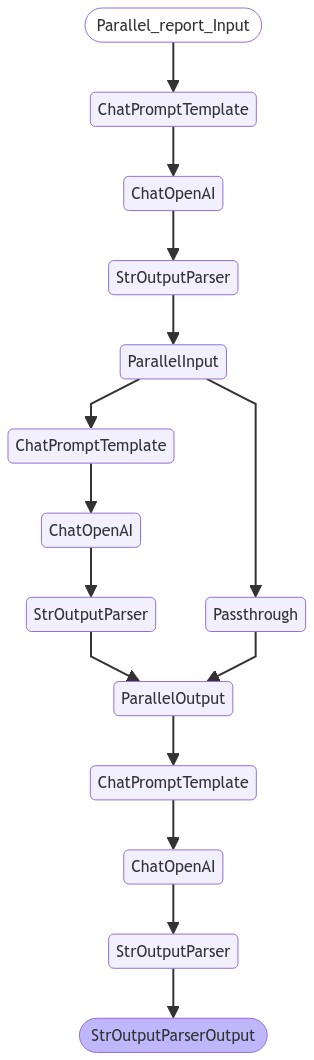

In [38]:
from IPython.display import Image
Image(composed_chain.get_graph().draw_mermaid_png())